<a href="https://colab.research.google.com/github/AmiraOsamaMohamed/GraduationProject/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#preprocess

In [128]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import nltk
import re
import spacy
from nltk import word_tokenize , sent_tokenize
from nltk.corpus import stopwords

In [130]:
#read json file and convert it to DataFrame
import json
def read_data(path):
 data = []

 with open(path) as trainFile:
    for line in trainFile:
        data.append(json.loads(line))
 all_data=pd.DataFrame(data)
 all_data.head()
 #split col(answers) to text and start_char and combine them as base columns in big DataFrame
 line=[]
 list_text=[]
 list_start_char=[]
 list_pq_id=[]

 for i in range(0,len(data)):
   line.extend(data[i]['answers'])


 for i in range(0,len(data)):
   list_text.append(line[i]['text'])



 for i in range(0,len(data)):
   list_start_char.append(line[i]['start_char'])



 for i in range(0,len(data)):
   list_pq_id.append(data[i]['pq_id'])



 answer_df=pd.DataFrame(list_pq_id,columns=['pq_id'])
 answer_df['text']=list_text
 answer_df['start_char']=list_start_char
 answer_df.head()

#merge between 2 DataFrame
 merged_data = pd.merge(all_data, answer_df, on="pq_id")
 merged_data = merged_data.drop(columns=["answers"])
 merged_data = merged_data.rename(columns={"text":"answer"})
 merged_data.head()
 return merged_data

In [131]:
#convert merged data to csv file
train=read_data('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_train.jsonl')
validation=read_data('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_dev.jsonl')
test=read_data('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_test_gold.jsonl')
train.to_csv('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_train.csv', index=False)
validation.to_csv('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_dev.csv', index=False)
test.to_csv('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_test_gold.csv', index=False)


#Analysis


ما
['ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن

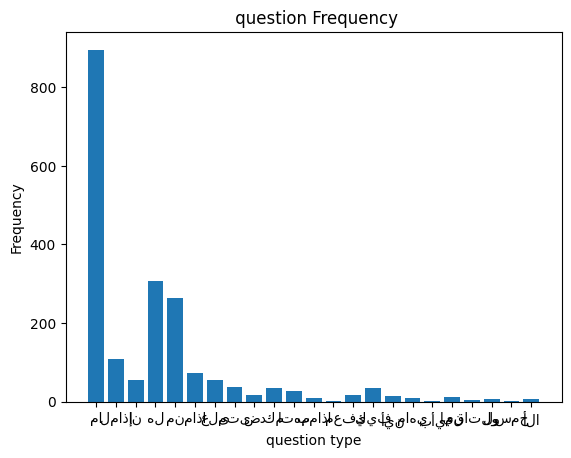

In [164]:
type(train)
print(((train['question'][0]).split())[0])
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
question_types=[]
# Compute the frequency of different question types
for i in range(0,992):
 question_types.append( ((train['question'][i]).split())[0] )
print(question_types)
word_freq = {}
for word in question_types:
    word_freq[word] = word_freq.get(word, 0) + 2


words = list(word_freq.keys())
freq = list(word_freq.values())

plt.bar(words[:], freq[:])
plt.xlabel('question type')
plt.ylabel('Frequency')
plt.title(' question Frequency')
plt.show()


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   pq_id       992 non-null    object
 1   passage     992 non-null    object
 2   surah       992 non-null    object
 3   verses      992 non-null    object
 4   question    992 non-null    object
 5   answer      992 non-null    object
 6   start_char  992 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 94.3+ KB


In [158]:
# check if there are null values in all columns
train.isnull().sum().sum()

0

In [159]:
train.describe()

,start_char
count,992.000000
mean,170.676411
std,154.555902
min,0.000000
25%,41.000000
50%,139.000000
75%,255.000000
max,909.000000


9
['ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'ما', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'لماذا', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن', 'إن'

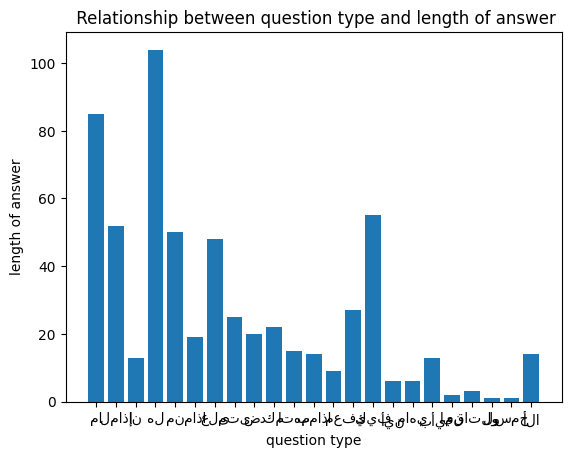

In [175]:
#type of question and len of answers
question_types=[]
len_of_each_answers=[]
print(len(train['answer'][0].split()))
# Compute the frequency of different question types
for i in range(0,992):
 question_types.append( ((train['question'][i]).split())[0] )


print(question_types)
for i in range(0,992):
  len_of_each_answers.append( len( (train['answer'][i]).split())  )

plt.bar( question_types[:],len_of_each_answers[:])
plt.xlabel('question type')
plt.ylabel('length of answer')
plt.title(' Relationship between question type and length of answer')
plt.show()

In [180]:
question_types=[]
# Compute the frequency of different question types
for i in range(0,992):
 question_types.extend( ((train['question'][i]).split()) )
print(question_types)
word_freq = {}
for word in question_types:
    word_freq[word] = word_freq.get(word, 0) + 2
    print(f"{word}==>{word_freq[word]}")

Streaming output truncated to the last 5000 lines.
في==>94
القرآن؟==>76
ما==>364
هي==>72
انواع==>72
الحيوانات==>72
التي==>72
ذكرت==>72
في==>96
القرآن؟==>78
ما==>366
هي==>74
انواع==>74
الحيوانات==>74
التي==>74
ذكرت==>74
في==>98
القرآن؟==>80
ما==>368
هي==>76
انواع==>76
الحيوانات==>76
التي==>76
ذكرت==>76
في==>100
القرآن؟==>82
ما==>370
هي==>78
انواع==>78
الحيوانات==>78
التي==>78
ذكرت==>78
في==>102
القرآن؟==>84
ما==>372
هي==>80
انواع==>80
الحيوانات==>80
التي==>80
ذكرت==>80
في==>104
القرآن؟==>86
ما==>374
هي==>82
انواع==>82
الحيوانات==>82
التي==>82
ذكرت==>82
في==>106
القرآن؟==>88
ما==>376
هي==>84
انواع==>84
الحيوانات==>84
التي==>84
ذكرت==>84
في==>108
القرآن؟==>90
ما==>378
هي==>86
انواع==>86
الحيوانات==>86
التي==>86
ذكرت==>86
في==>110
القرآن؟==>92
ما==>380
هي==>88
انواع==>88
الحيوانات==>88
التي==>88
ذكرت==>88
في==>112
القرآن؟==>94
ما==>382
هي==>90
انواع==>90
الحيوانات==>90
التي==>90
ذكرت==>90
في==>114
القرآن؟==>96
ما==>384
هي==>92
انواع==>92
الحيوانات==>92
التي==>92
ذكرت==>92
في==>116
القرآن؟=

In [ ]:
#apply splitting on answers on json file
# Convert the DataFrame to JSON
json_data = train.to_json(orient='records')

# Write the JSON data train to a file
with open('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_train.jsonl', 'w') as json_file:
    json_file.write(json_data)

json_data = validation.to_json(orient='records')





# Write the JSON data validation to a file
with open('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_dev.jsonl', 'w') as json_file:
    json_file.write(json_data)




json_data = test.to_json(orient='records')

# Write the JSON data test to a file
with open('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_test_gold.jsonl', 'w') as json_file:
    json_file.write(json_data)



In [181]:
#clean text
def clean(text):
    text = re.sub(r"http\S+", " ", text)  # remove urls
    text = re.sub(r"@[\w]*", " ", text)  # remove handles
    text = re.sub(r"[\.\,\#_\|\:\?\?\/\=]", " ", text) # remove special characters
    text = re.sub(r"\t", " ", text)  # remove tabs
    text = re.sub(r"\n", " ", text)  # remove line jump
    text = re.sub(r"\s+", " ", text)  # remove extra white space
    text = re.sub(r'[^\w\s]', '', text) # Removing punctuations in string using regex
    text = text.strip()
    return text

In [182]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# Function to tokenize sentences
def tokenize_words(text):
    return word_tokenize(text)

# Function to remove stopwords from tokenized text
stop_words = set(stopwords.words('arabic'))
def remove_stopwords(tokenized_text):
    return [word for word in tokenized_text if word not in stop_words]


# Function to return to the base of word(stemmer) from tokenized text
stemmer = SnowballStemmer('arabic')
def stem_words(tokenized_text):
    return [stemmer.stem(word) for word in tokenized_text]


def processed_text(text):
  cleaned_text=clean(text)
  tokenized_text=tokenize_words(cleaned_text)
  underProcessing_text=remove_stopwords(tokenized_text)
  processed_text=stem_words(underProcessing_text)
  return processed_text


# Apply the functions(processing) to the DataFrame
train['passage'] = train['passage'].apply(processed_text)


train['question'] = train['question'].apply(processed_text)


train['answer'] = train['answer'].apply(processed_text)

# train = train.drop(columns=['surah'])

# train = train.drop(columns=['verses'])


# Print the DataFrame
train.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,pq_id,passage,surah,verses,question,answer,start_char
0,2:1-5_372,"[الم, كتاب, ريب, هدى, متق, يومن, غيب, يقيم, صل...",2,1-5,"[دلايل, قرء, تاليف, سيد, محمد]","[يومن, انزل, انزل, قبل]",97
1,2:23-24_372,"[كنتم, ريب, نزل, عبد, اتو, سور, مثل, وادع, شهد...",2,23-24,"[دلايل, قرء, تاليف, سيد, محمد]","[كنتم, ريب, نزل, عبد, اتو, سور, مثل]",1
2,2:40-48_372,"[بن, اسراييل, اذكر, نعم, انعم, عل, اوف, عهد, ا...",2,40-48,"[دلايل, قرء, تاليف, سيد, محمد]","[امنو, انزل, مصدق, معكم]",85
3,2:91-93_372,"[قيل, امنو, انزل, الله, قالو, نوم, انزل, عل, ي...",2,91-93,"[دلايل, قرء, تاليف, سيد, محمد]","[قيل, امنو, انزل, الله]",1
4,2:97-101_372,"[قل, عدو, جبريل, فان, نزل, قلب, باذ, الله, مصد...",2,97-101,"[دلايل, قرء, تاليف, سيد, محمد]","[الحق, مصدق, معهم]",78


In [183]:
validation['passage'] = validation['passage'].apply(processed_text)


validation['question'] = validation['question'].apply(processed_text)


validation['answer'] = validation['answer'].apply(processed_text)


# Print the DataFrame
validation.head()

,pq_id,passage,surah,verses,question,answer,start_char
0,13:18-24_360,"[ذين, استجاب, لرب, حسنى, يستجيب, ارض, جميع, مث...",13,18-24,"[سيجمع, الله, مومن, ابناء, اهل, الجن]","[جنا, عدن, يدخل, صلح, اباء, ازواج, وذر]",451
1,40:7-9_360,"[يحمل, عرش, حول, يسبح, حمد, ربهم, يومن, يستغفر...",40,7-9,"[سيجمع, الله, مومن, ابناء, اهل, الجن]","[ربن, ادخل, جنا, عدن, وعد, صلح, اباء, ازواج, وذر]",156
2,52:17-28_360,"[متق, جنا, نعيم, فاكه, اتا, ربهم, ووق, ربهم, ع...",52,17-28,"[سيجمع, الله, مومن, ابناء, اهل, الجن]","[امنو, واتبع, ذر, ايم, الحق, ذر]",151
3,73:15-19_386,"[ارسل, رسول, شاهد, عل, ارسل, رعو, رسول, عصى, ر...",73,15-19,"[علاق, خوف, اضطراب, نفس, شيب]","[تتقو, فرتم, يوم, يجعل, ولد, شيب]",102
4,28:76-81_114,"[قارو, قوم, موسى, بغى, عل, اتين, كنوز, مفاتح, ...",28,76-81,"[خسف, الله, ارض]",[قارو],479


In [184]:
test['passage'] = test['passage'].apply(processed_text)


test['question'] = test['question'].apply(processed_text)


test['answer'] = test['answer'].apply(processed_text)


test.head()

,pq_id,passage,surah,verses,question,answer,start_char
0,2:1-5_570,"[الم, كتاب, ريب, هدى, متق, يومن, غيب, يقيم, صل...",2,1-5,"[موم, تعريف, قرء]","[يومن, غيب, يقيم, صلا, ومم, رزقن, ينفق]",40
1,2:1-5_610,"[الم, كتاب, ريب, هدى, متق, يومن, غيب, يقيم, صل...",2,1-5,"[الرد, زعم, احتواء, قرء, مفاهيم, عقل, علم, مغلوط]","[يومن, انزل, انزل, قبل, اخر, يوقن]",97
2,2:21-22_505,"[ناس, اعبد, ربكم, خلق, قبل, لعل, تتقو, ارض, را...",2,21-22,"[دلايل, قرء, انزل, جميع, ناس, امم, شعوب]","[كتاب, ريب]",5
3,2:34-39_568,"[قلن, ملايك, اسجد, لادم, سجد, ابليس, ابى, واست...",2,34-39,"[لماذ, يعاد, شيط, انس]","[ناس, اعبد, ربكم, خلق, قبل]",0
4,2:60-62_611,"[استسقى, موسى, لقوم, فقل, اضرب, بعص, حجر, فانف...",2,60-62,"[دليل, ادل, وحد, الاد, انزل, الله]","[قلن, ملايك, اسجد, لادم, سجد, ابليس, ابى, واست...",1


In [185]:
train.to_csv('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_train.csv', index=False)
validation.to_csv('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_dev.csv', index=False)
test.to_csv('/content/drive/MyDrive/data/QQA23_TaskB_qrcd_v1.2_test_gold.csv', index=False)